# NLP with Disaster Tweets

In [ ]:

import re, string, os

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, concatenate, Dropout 
from tensorflow.keras import Model
import tensorflow_hub as hub


from symspellpy import SymSpell, Verbosity

import spacy 

from sentence_transformers import SentenceTransformer 

from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.utils import shuffle

import matplotlib.pyplot as plt


## Importing data

In [ ]:
train = pd.read_csv('nlp-getting-started/train.csv')
test = pd.read_csv('nlp-getting-started/test.csv')


## EDA

In [ ]:
train.sample(5)


,id,keyword,location,text,target
4975,7093,meltdown,"Flushing, Queens",LOL Warthen in the midst of bullpen meltdown r...,0
5981,8541,screaming,amsterdayum 120615 062415,@ArianaGrande @justinbieber OMGGGG IM SCREAMING,0
5847,8355,ruin,NaN,I understand you wanting to hang out with your...,0
6863,9835,trauma,"Minneapolis, MN",Both kids got haircuts w minimal trauma. Clear...,0
5278,7543,oil%20spill,"Pensacola, FL",Senator voices concerns over BP oil spill sett...,1


In [ ]:
train.shape

(7613, 5)

<Axes: >

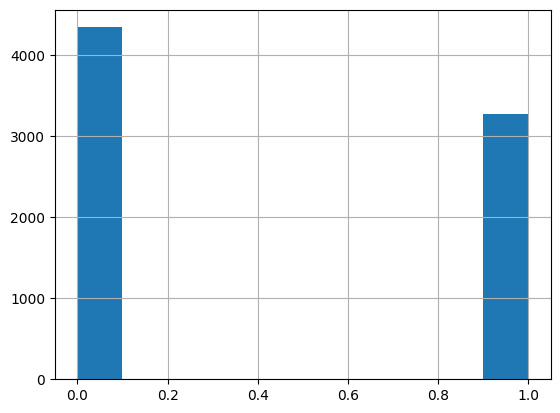

In [ ]:
train.target.hist()

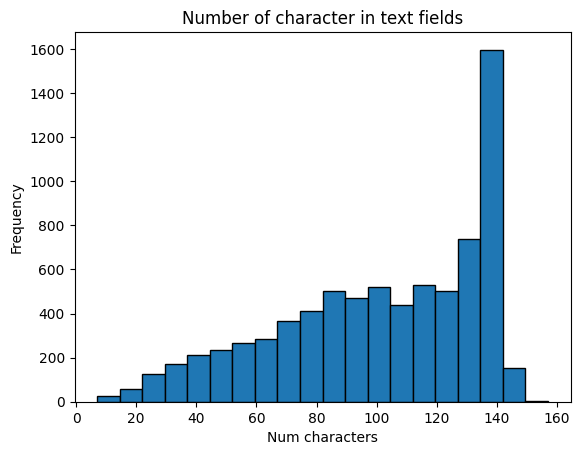

In [ ]:
# Character in each row - histogram

# Aggiungi una nuova colonna che contiene il numero di caratteri in ogni testo
data = train['text'].apply(len)

# Plotta l'istogramma
plt.hist(data, bins=20, edgecolor='black')  # Puoi regolare il numero di bin secondo le tue esigenze
plt.title('Number of character in text fields')
plt.xlabel('Num characters')
plt.ylabel('Frequency')
plt.show()